In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [462]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [463]:
#Classification Task

df = pd.read_csv("/content/drive/MyDrive/Assessment/Classification task/heart_attack_risk_dataset.csv")
df.head(10)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
5,41,Male,0,1,Moderate,36.11,0,0,271.2,141,119,0,Low,Atypical,Fixed defect,0,Normal,0,101,High
6,20,Male,1,0,Low,15.12,0,0,164.8,154,67,0,Low,Non-anginal,Normal,0,Normal,0,176,Low
7,39,Female,0,0,Moderate,20.78,0,0,297.0,91,112,0,Low,Atypical,Normal,0,ST-T abnormality,1,134,Moderate
8,70,Male,0,1,High,29.20,0,0,280.7,121,71,0,Moderate,Non-anginal,Fixed defect,0,ST-T abnormality,0,168,Moderate
9,19,Female,0,0,High,35.54,0,1,275.0,167,76,0,Low,Typical,Reversible defect,1,Left Ventricular Hypertrophy,0,102,Moderate


a. When and by whom was the dataset created?
Answers:The Heart Attack Risk dataset was created by UCI Machine Learning Repository and contributed by Dr. N. S. N. Murthy. However other details are unknown/.

 b. How did you access the dataset?
 Answer: I accessed this dataset from Kaggle, world's largest data science community and a platform for data science competitions, resources and tools.

 c. How does it align with the chosen UNSDG?
 Answer: The Heart Attack Risk dataset aligns with UNSDG Goal 3: Good Health and Well-being, which aims to ensure healthy lives and promote well-being for all at all ages.

 d. List all the attributes (columns) present in the dataset.
 Answer: The Solumns present in this dataset are: 'Age','Gender', 'Smoking', 'Alcohol_Consumption',
 'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
  'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History','Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar','ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved','Heart_Attack_Risk'

In [464]:
## **Step 3: Exploratory Data Analysis (EDA)**
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()
print("Dataset Description:")
print(df.describe())

Dataset Shape: (50000, 20)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-

In [ ]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64


In [465]:
# Handling Categorical Data (if any)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])


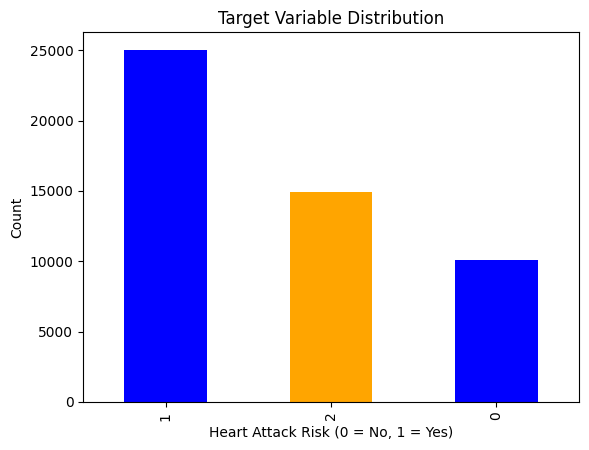

In [466]:
# Visualizing Target Variable
df['Heart_Attack_Risk'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Target Variable Distribution")
plt.xlabel("Heart Attack Risk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


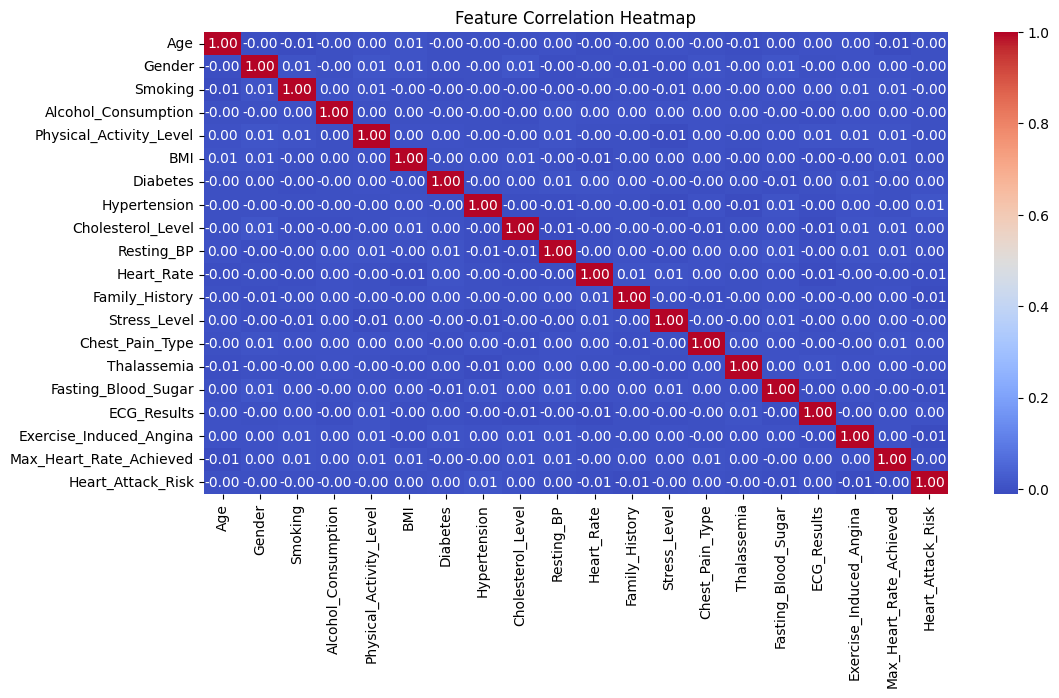

In [467]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap")
plt.show()


In [468]:
print(df.columns)


Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')


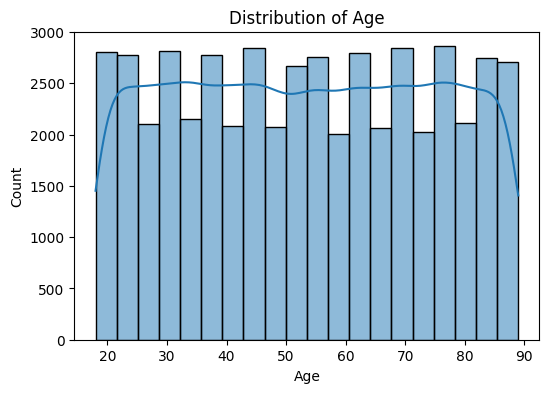

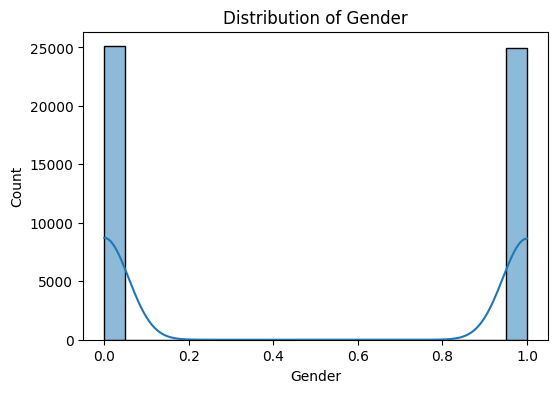

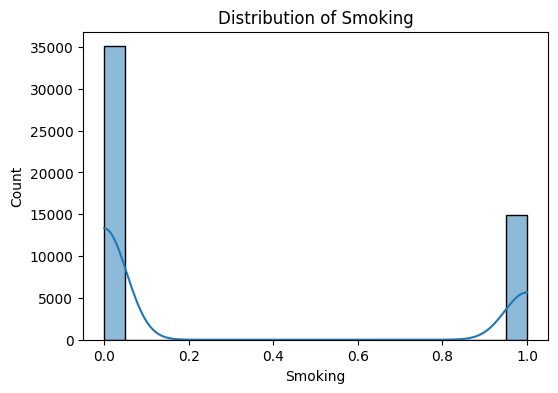

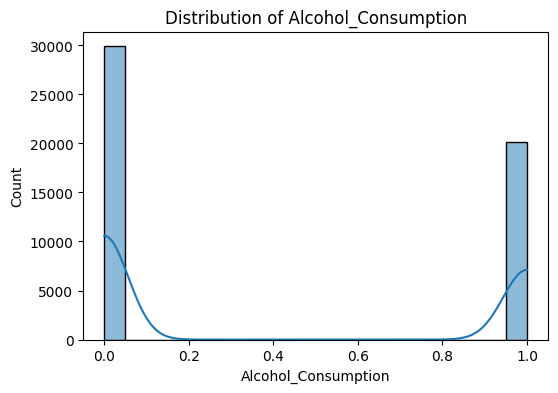

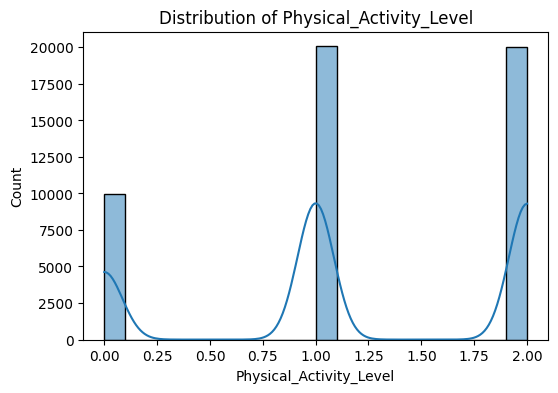

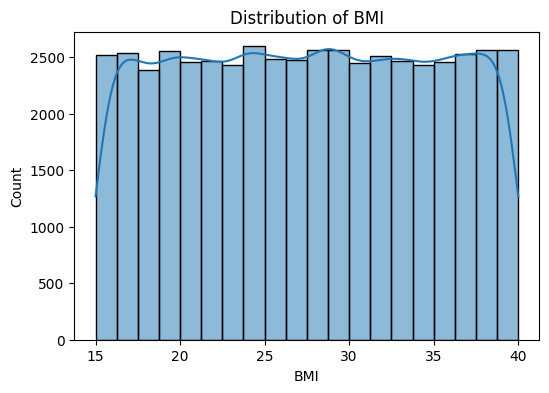

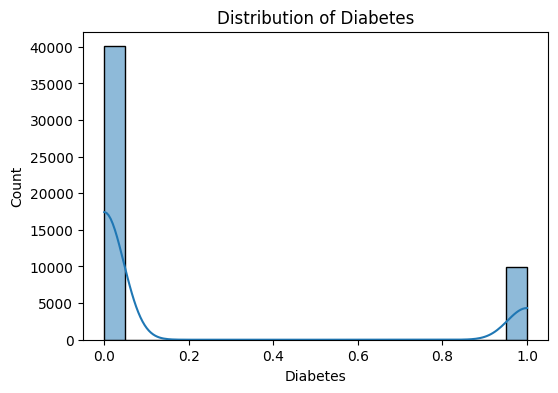

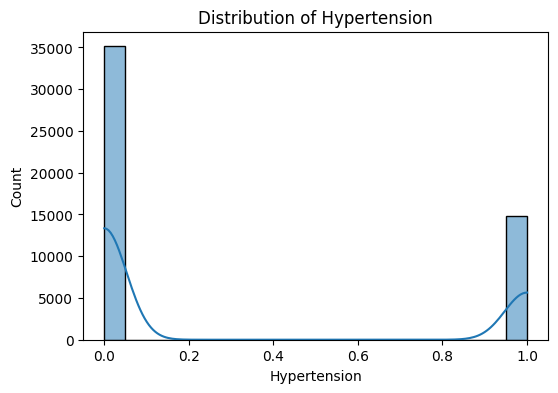

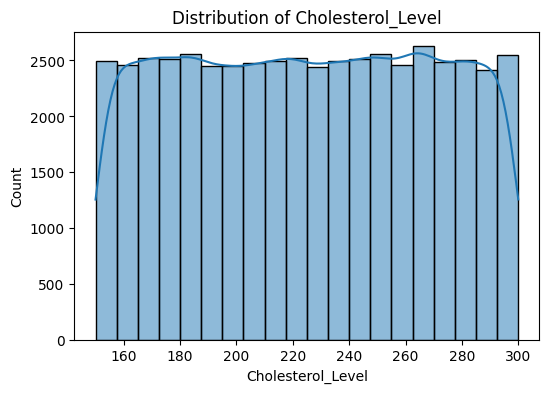

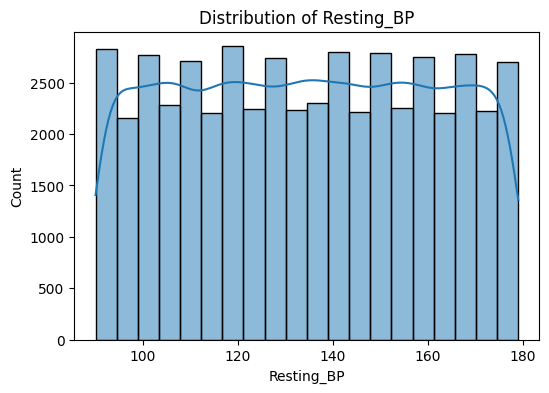

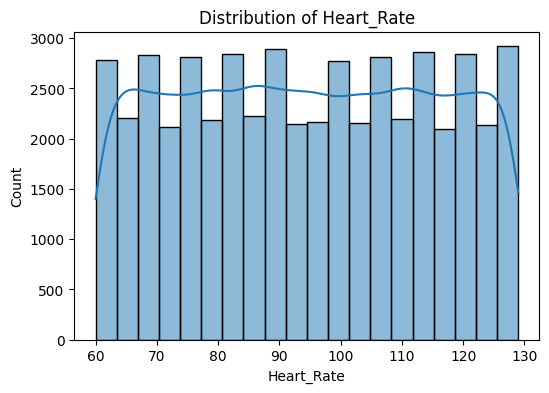

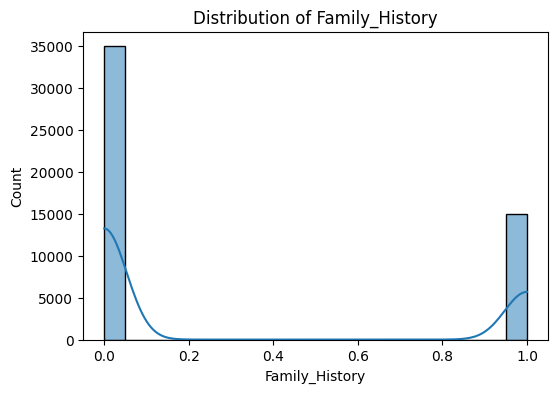

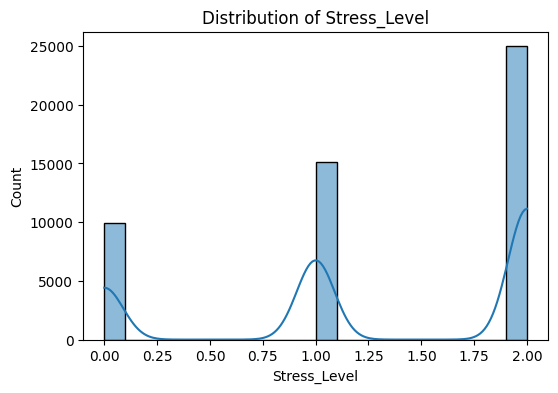

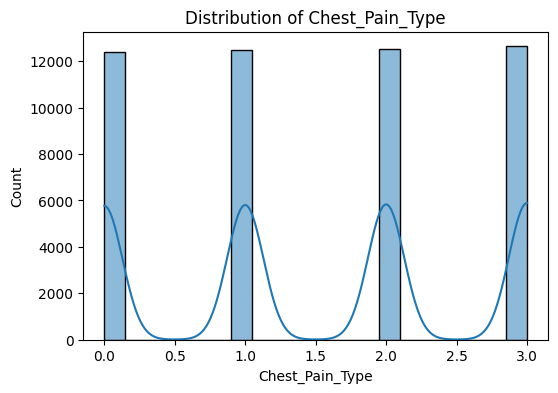

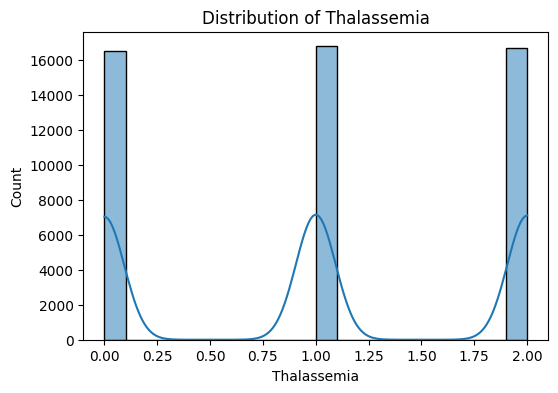

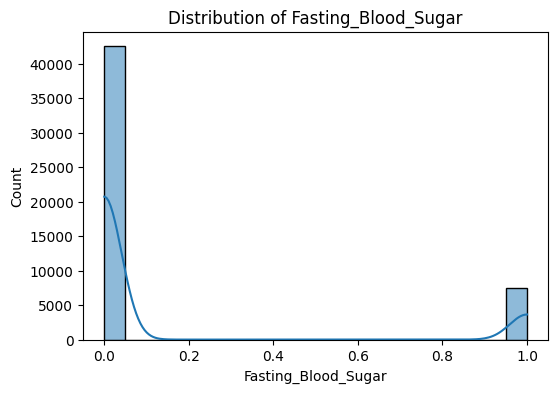

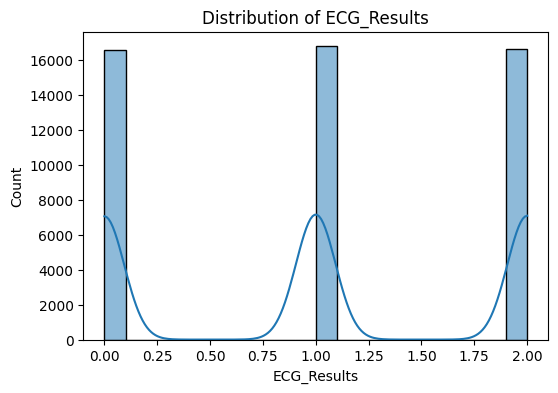

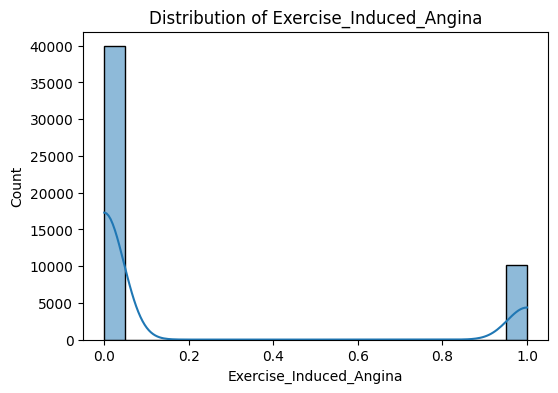

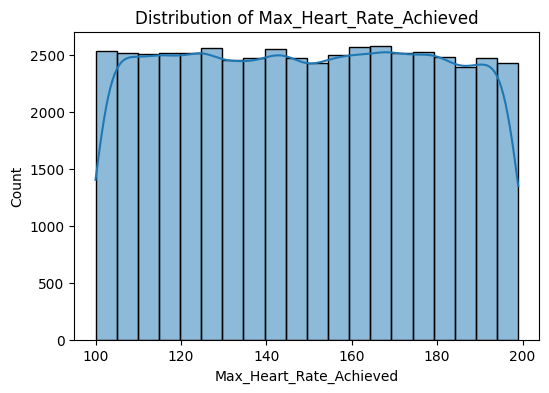

In [469]:
# Feature Distributions
columns = df.columns.drop(['Heart_Attack_Risk'])
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


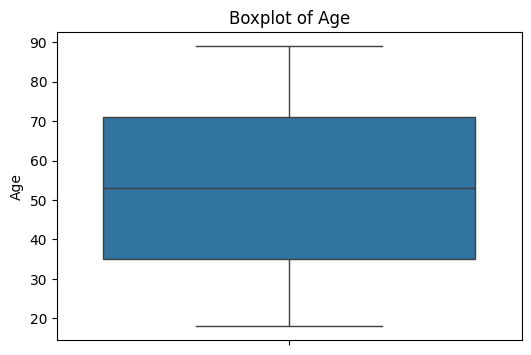

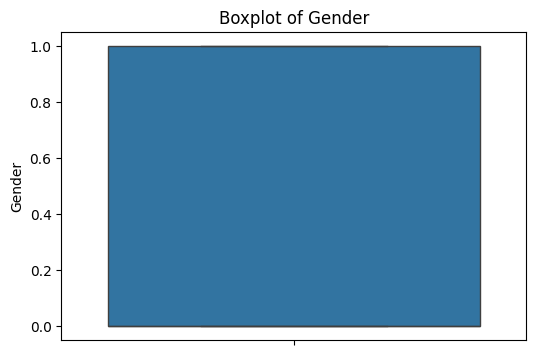

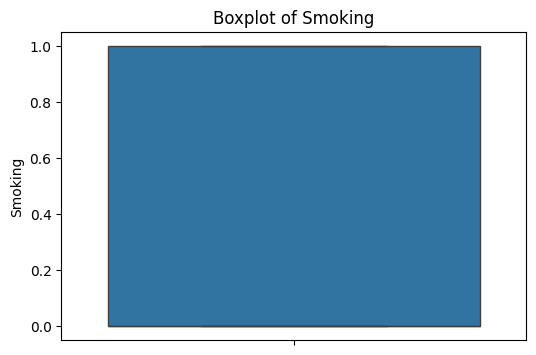

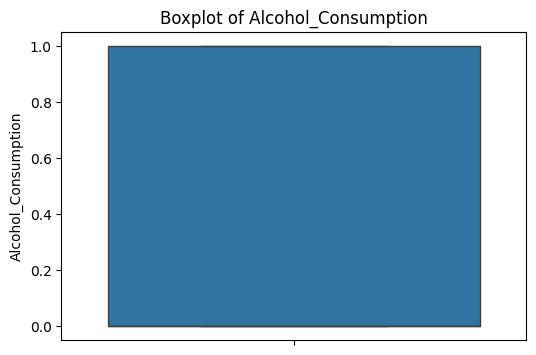

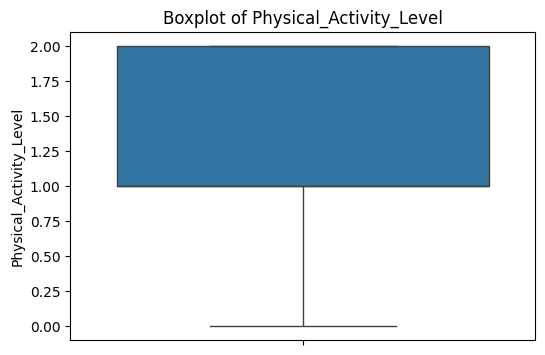

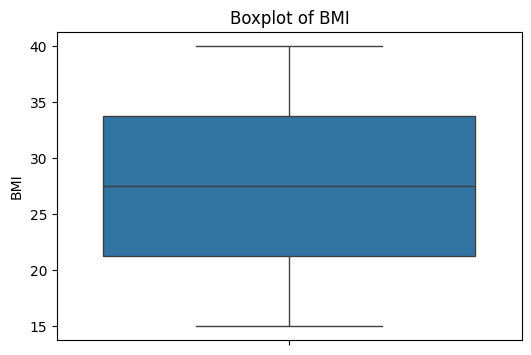

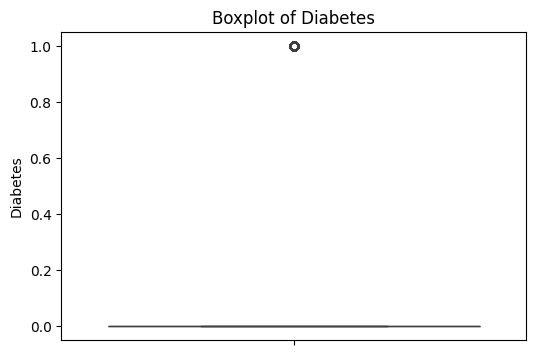

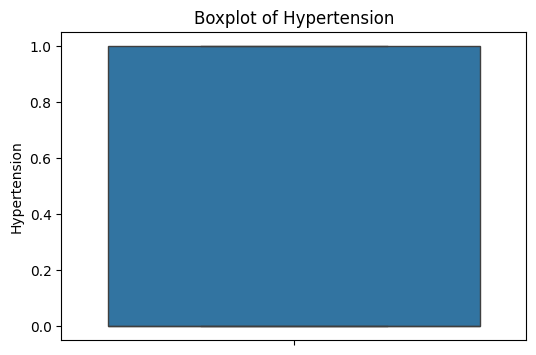

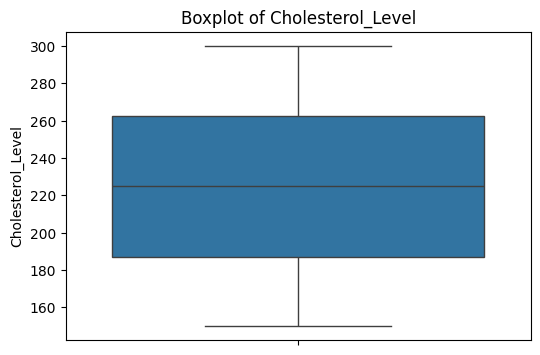

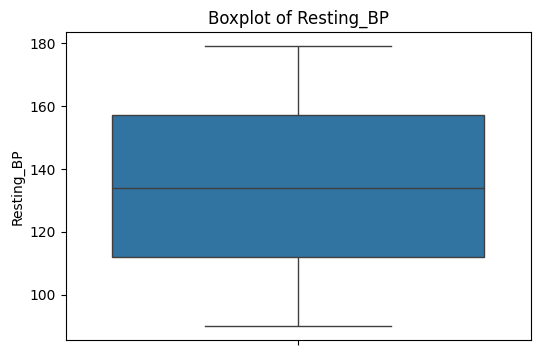

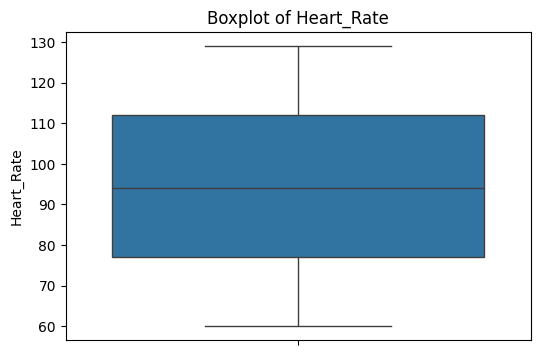

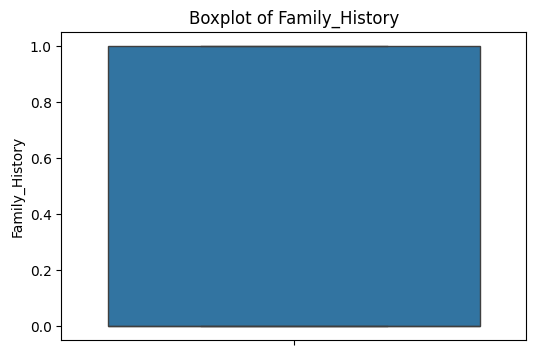

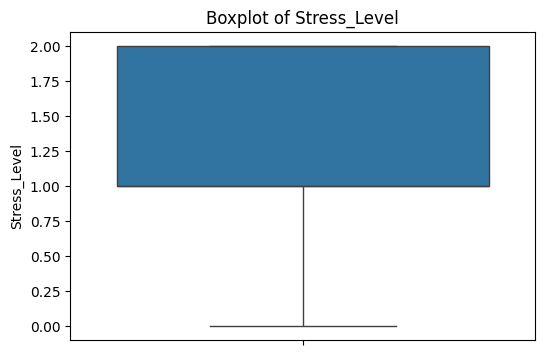

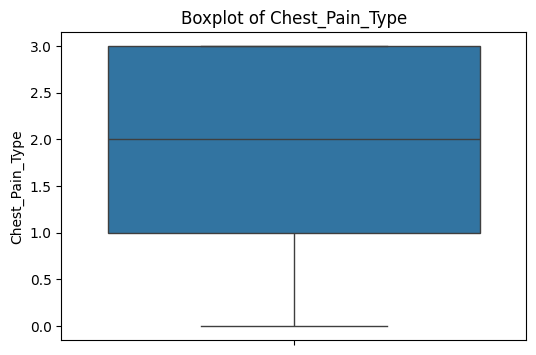

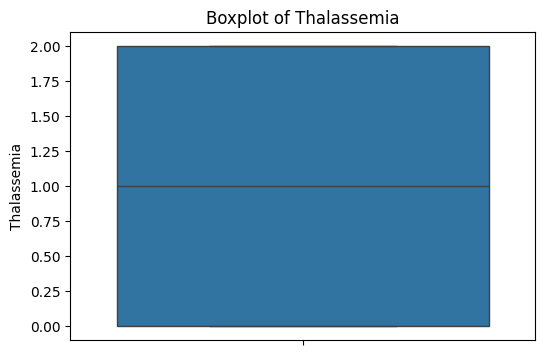

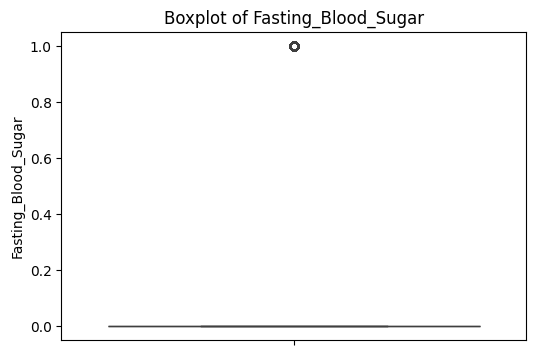

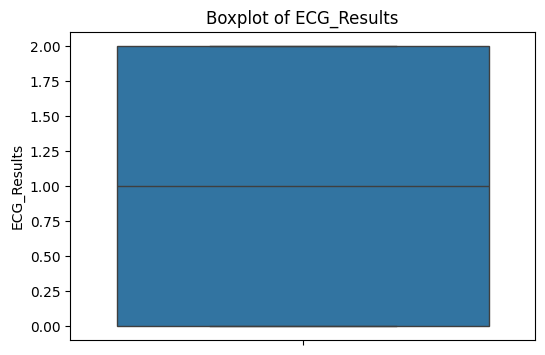

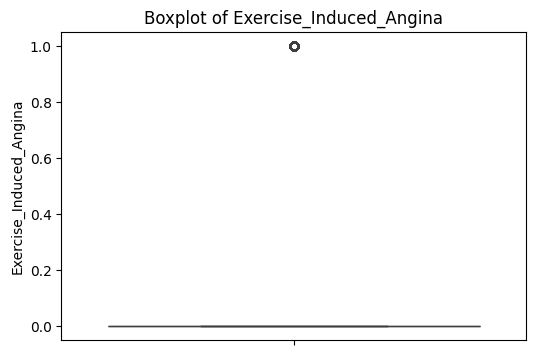

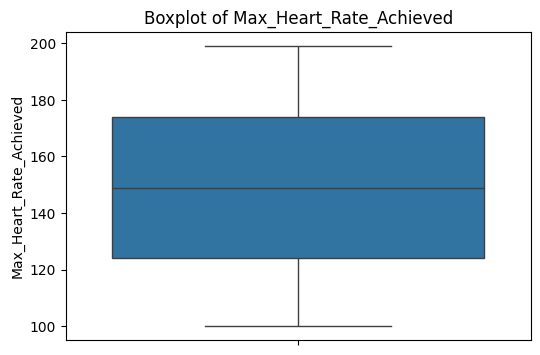

In [470]:
# Boxplots for each feature
columns = df.columns.drop(['Heart_Attack_Risk'])  # Drop the target column
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=col)  # Use 'y' for plotting single column distribution
    plt.title(f'Boxplot of {col}')
    plt.show()



In [471]:
# Split data into train and test sets
X = df.drop(columns=['Heart_Attack_Risk'])  # Drop the target column
y = df['Heart_Attack_Risk']  # Set target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [472]:
# Check unique classes in the target column
print(df['Heart_Attack_Risk'].nunique())  # Number of unique classes


3


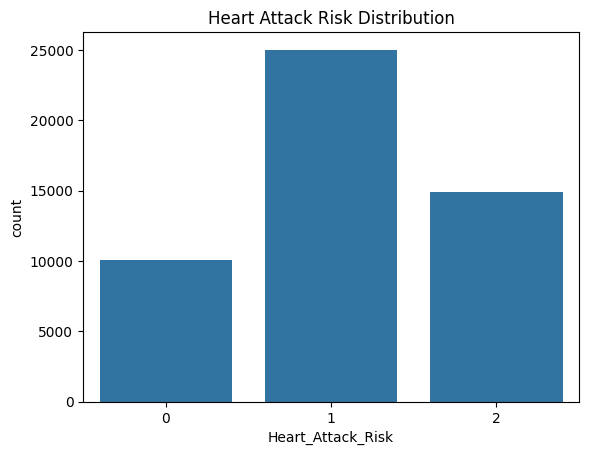

In [473]:
# Visualizing class distribution
sns.countplot(x=df['Heart_Attack_Risk'])
plt.title('Heart Attack Risk Distribution')
plt.show()

In [474]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'Heart_Attack_Risk':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [475]:
# Splitting dataset
X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [476]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [477]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Softmax Function (Corrected for numerical stability)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Compute class weights using sklearn's utility
def compute_weights(y):
    # Compute class weights based on inverse frequency of classes
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

    # Return as a dictionary for convenience (you can also keep it as a numpy array)
    return {i: class_weights[i] for i in range(len(class_weights))}



In [515]:
def cost_softmax(X, y, W, b, class_weights):
    m = X.shape[0]  # Number of samples
    scores = np.dot(X, W) + b  # Compute the scores (logits)
    probs = softmax(scores)  # Apply softmax to get probabilities

    # Get the log likelihood for each sample (negative log of predicted probabilities)
    log_likelihood = -np.log(probs[range(m), np.argmax(y, axis=1)])

    # Apply class weights (ensure class_weights is a dictionary or array indexed correctly)
    weighted_log_likelihood = log_likelihood * np.array([class_weights[i] for i in np.argmax(y, axis=1)])

    # Compute the average cost
    cost = np.sum(weighted_log_likelihood) / m
    return cost


In [479]:
def compute_gradient_softmax(X, y, W, b):
    m = X.shape[0]
    scores = np.dot(X, W) + b
    probs = softmax(scores)

    # One-hot encoded y -> target values (not probabilities)
    y_one_hot = np.argmax(y, axis=1)

    # Gradient of weights and biases
    grad_W = -np.dot(X.T, (y - probs)) / m
    grad_b = -np.sum(y - probs, axis=0, keepdims=True) / m

    return grad_W, grad_b

In [480]:
def initialize_weights(n_features, n_classes):
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))
    return W, b

In [516]:
def gradient_descent_softmax(X, y, alpha=0.001, n_iter=5000, tol=1e-6):
    n_features, n_classes = X.shape[1], y.shape[1]
    W, b = initialize_weights(n_features, n_classes)

    # Convert one-hot encoded labels back to categorical for class weights
    class_weights_dict = compute_weights(np.argmax(y, axis=1))
    class_weights = np.array([class_weights_dict.get(i, 1) for i in range(n_classes)])

    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b, class_weights)  # Pass class weights here
        cost_history.append(cost)

        if i > 10 and abs(cost_history[-2] - cost_history[-1]) < tol:
            print(f"Stopping early at iteration {i} due to minimal improvement.")
            break

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


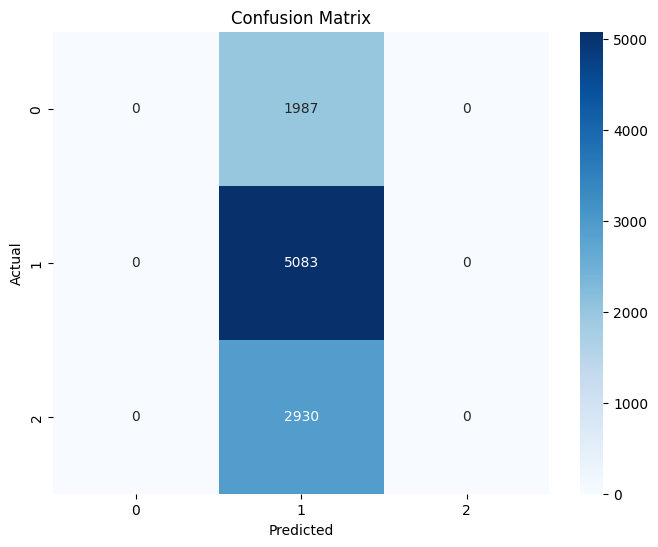

In [497]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_model(X_test, y_test, W, b, class_names):
    # Get predictions
    scores = np.dot(X_test, W) + b
    probs = softmax(scores)
    y_pred = np.argmax(probs, axis=1)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, class_names)

# Assuming X_train, X_test, y_train_one_hot, and y_test are defined
class_names = ['0', '1', '2']  # List of class labels

# Evaluate on test set
evaluate_model(X_test, y_test, W_opt, b_opt, class_names)

In [484]:
# One-hot Encoding Target Variable
y_train_one_hot = np.eye(len(np.unique(y_train)))[y_train]
y_test_one_hot = np.eye(len(np.unique(y_test)))[y_test]


In [485]:
# Initializing Parameters
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

In [494]:
# Train Softmax Regression
W_opt, b_opt, cost_hist = gradient_descent_softmax(X_train, y_train_one_hot, alpha=0.01, n_iter=1000)


Iteration 0: Cost = 1.098609
Iteration 100: Cost = 1.103991
Iteration 200: Cost = 1.114640
Iteration 300: Cost = 1.125604
Iteration 400: Cost = 1.135069
Iteration 500: Cost = 1.142642
Iteration 600: Cost = 1.148480
Iteration 700: Cost = 1.152895
Iteration 800: Cost = 1.156205
Iteration 900: Cost = 1.158679


In [488]:
def predict_softmax(X, W, b):
    return np.argmax(softmax(np.dot(X, W) + b), axis=1)


In [489]:
# Making Predictions
y_pred_softmax = predict_softmax(X_test, W_opt, b_opt)


In [517]:
# Model Evaluation
print("Softmax Regression from Scratch Performance:")
print(classification_report(y_test, y_pred_softmax))


Softmax Regression from Scratch Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [513]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with class weighting
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Print classification report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.19      0.37      0.26      1987
           1       0.50      0.24      0.33      5083
           2       0.28      0.36      0.32      2930

    accuracy                           0.30     10000
   macro avg       0.32      0.32      0.30     10000
weighted avg       0.37      0.30      0.31     10000



In [492]:
# Training Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.24      0.00      0.01      1987
           1       0.51      0.94      0.66      5083
           2       0.27      0.05      0.08      2930

    accuracy                           0.49     10000
   macro avg       0.34      0.33      0.25     10000
weighted avg       0.39      0.49      0.36     10000



In [502]:
# Hyperparameter Optimization for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
best_rf = gs.best_estimator_

In [503]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [512]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights (using 'balanced' to automatically adjust for imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Train Random Forest with class weights
rf_model = RandomForestClassifier(class_weight=class_weight_dict)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Final Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Final Random Forest Performance:
              precision    recall  f1-score   support

           0       0.22      0.00      0.00      1987
           1       0.51      0.97      0.67      5083
           2       0.29      0.03      0.06      2930

    accuracy                           0.50     10000
   macro avg       0.34      0.33      0.24     10000
weighted avg       0.39      0.50      0.36     10000



In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [518]:
#Regression Task

df = pd.read_csv("/content/drive/MyDrive/Assessment/Regression task/Energy_consumption.csv")
df.head(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885
6,2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791
7,2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Thursday,Yes,74.131906
8,2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Sunday,No,78.206236
9,2022-01-01 09:00:00,22.212549,32.418464,1705.420336,1,On,Off,29.140071,Tuesday,No,77.992214


In [525]:
## **Step 3: Exploratory Data Analysis (EDA)**
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()
print("Dataset Description:")
print(df.describe())
print("Checking for Missing Values:")
print(df.isnull().sum())

Dataset Shape: (1000, 11)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
Dataset Description:
       Temperature     Humidity  SquareFootage    Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  1000.000000      1

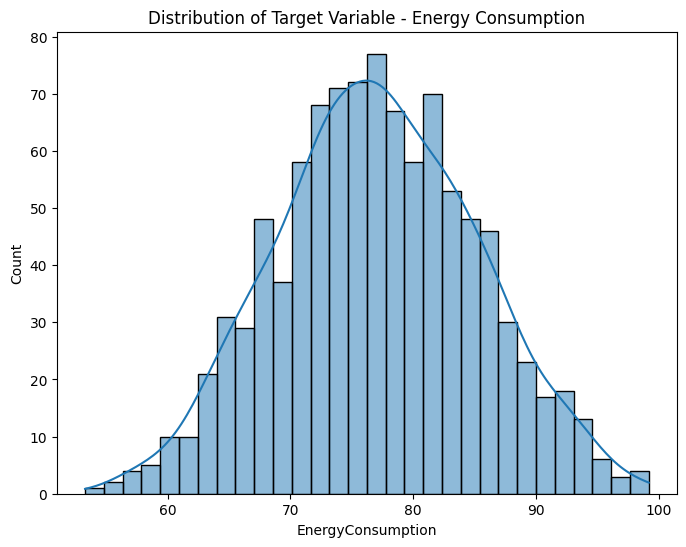

In [520]:
# Visualizing Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['EnergyConsumption'], bins=30, kde=True)
plt.title("Distribution of Target Variable - Energy Consumption")
plt.show()

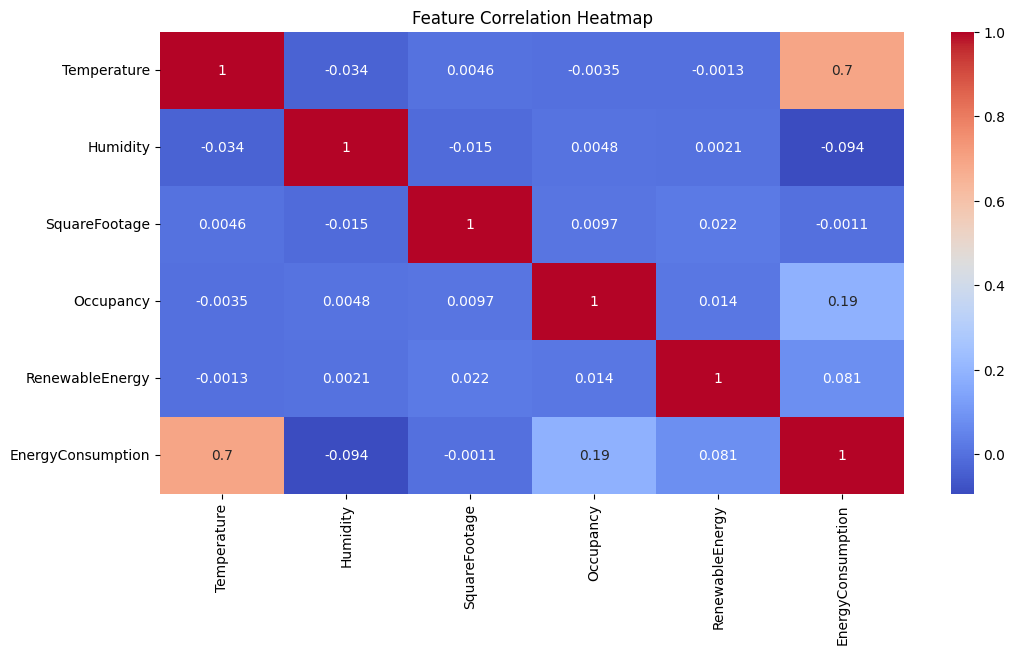

In [521]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [526]:
# Data Preprocessing
categorical_features = ["HVACUsage", "LightingUsage", "DayOfWeek", "Holiday"]
numerical_features = ["Temperature", "Humidity", "SquareFootage", "Occupancy", "RenewableEnergy"]
target = "EnergyConsumption"

In [540]:
# Convert categorical features to strings before encoding
df[categorical_features] = df[categorical_features].astype(str)


In [542]:
# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = StandardScaler()

In [543]:
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_features),
    ('cat', encoder, categorical_features)
])

In [544]:
# Splitting dataset
X = df[numerical_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [545]:
# Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(preprocessor.fit_transform(X_train), y_train)
X_test_selected = selector.transform(preprocessor.transform(X_test))


In [546]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [547]:
# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', selector),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


In [548]:
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

In [549]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

In [550]:
grid_search = GridSearchCV(Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
]), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Temperature',
                                                                          'Humidity',
                                                                          'SquareFootage',
                                                                          'Occupancy',
                                                                          'RenewableEnergy']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['HVACUsage',
                                                                          'LightingUsage',
                                                                          'DayOfWeek',
                                                                          'Holiday'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [551]:
best_params = grid_search.best_params_

# Print results
print("Model Performance:")
for model, metrics in results.items():
    print(f"{model}: {metrics}")

Model Performance:
Random Forest: {'MAE': 4.332397488269482, 'MSE': 29.048472801973354, 'RMSE': 5.389663514726439, 'R2': 0.5565110229010868}


In [552]:
print("Best Hyperparameters for Random Forest:", best_params)


Best Hyperparameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}


In [553]:
print("Feature Importance and Model Performance Summary:")
feature_scores = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))


Feature Importance and Model Performance Summary:
                     Feature       Score
0           num__Temperature  774.859517
5          cat__HVACUsage_On   61.884359
3             num__Occupancy   32.381487
4       num__RenewableEnergy    9.626494
1              num__Humidity    7.596899
6      cat__LightingUsage_On    4.955274
13          cat__Holiday_Yes    2.793725
11    cat__DayOfWeek_Tuesday    1.881912
8    cat__DayOfWeek_Saturday    0.846610
7      cat__DayOfWeek_Monday    0.830268
2         num__SquareFootage    0.422508
9      cat__DayOfWeek_Sunday    0.290084
10   cat__DayOfWeek_Thursday    0.141991
12  cat__DayOfWeek_Wednesday    0.005535
